<a href="https://colab.research.google.com/github/odu-cs625-datavis/public-fall24-mcw/blob/main/Vega_Altair_vs_Vega_Lite_JSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vega-Altair vs Vega-Lite JSON Examples**

Given that there are more JSON than API style examples, this notebook will provide some examples of translating Vega-Lite JSON specifications to Vega-Altair.

Many of the attributes found in the Vega-Lite JSON specification can be converted to functions in Altair. Vega-Altair is built on top of the high-level Vega-Lite grammar, allowing Altair to generate a Vega-Lite JSON specification behind the scenes when creating a visualization.

Vega-Altair docs - https://altair-viz.github.io/user_guide/data.html

Vega-Lite API docs - https://github.com/vega/vega-lite-api


In [ ]:
pip install vega_datasets

In [ ]:
import altair as alt
from vega_datasets import data as vega_data

### **Scatterplot Example**

Replication of this [JSON style example](https://observablehq.com/@vega/hello-vega-embed)

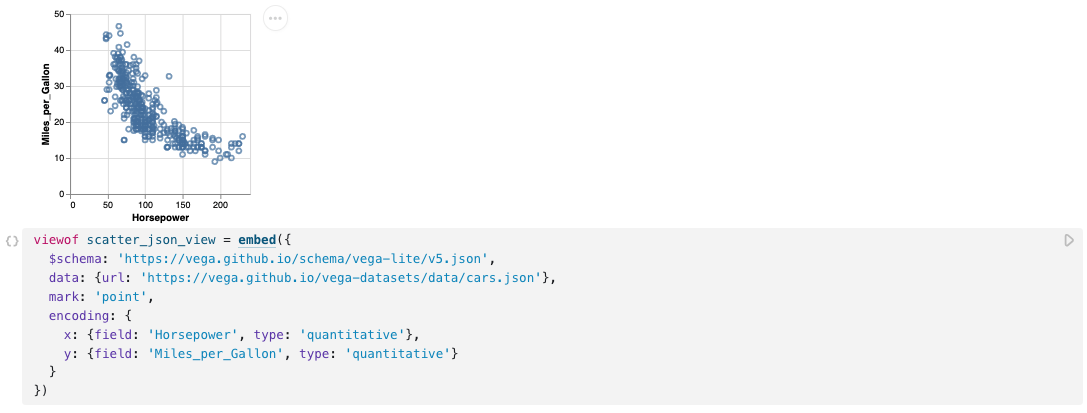

In [ ]:
cars = vega_data.cars()
cars.head()

Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration       Year Origin  
0       130.0           3504          12.0 1970-01-01    USA  
1       165.0           3693          11.5 1970-01-01    USA  
2       150.0           3436          11.0 1970-01-01    USA  
3       150.0           3433          12.0 1970-01-01    USA  
4       140.0           3449          10.5 1970-01-01    USA

Same chart using Vega-Altair below.

Transforms:

* `data: {url: '`*`URL`*`'}` &nbsp; &rarr; &nbsp; `.Chart(cars)`
* `mark: 'point'` &nbsp; &rarr; &nbsp; `.mark_point()`
* `encoding: {` &nbsp; &rarr; &nbsp; `.encode(`
* `x:` &nbsp; &rarr; &nbsp; `x = `
* `{field: 'Horsepower', type: 'quantitative'}` &nbsp; &rarr; &nbsp; `'Horsepower:Q'`
* `y:` &nbsp; &rarr; &nbsp; `y = `
* `{field: 'Miles_per_Gallon', type: 'quantitative'}` &nbsp; &rarr; &nbsp; `'Miles_per_Gallon:Q'`

In [ ]:
alt.Chart(cars).mark_point().encode(
    x = 'Horsepower:Q',
    y = 'Miles_per_Gallon:Q'
)

alt.Chart(...)

### **Bar Chart Example**

JSON style example in Observable

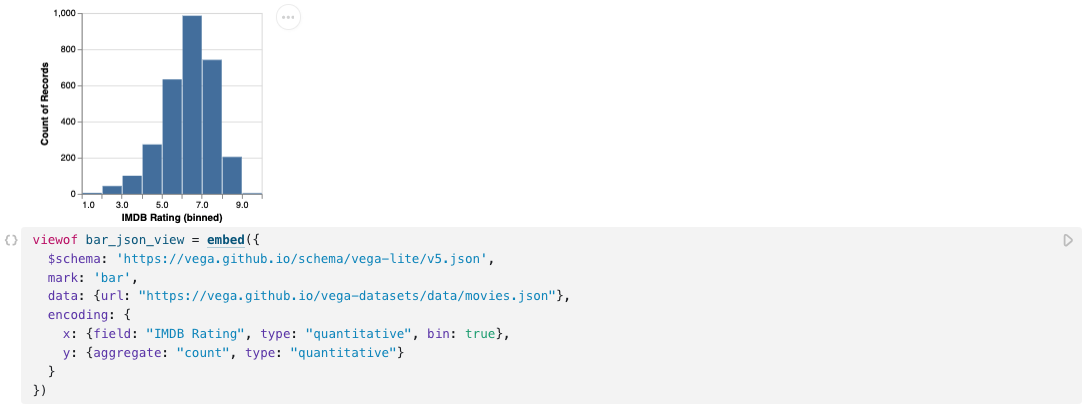


In [ ]:
movies = vega_data.movies()
movies.head()

Title   US_Gross  Worldwide_Gross  US_DVD_Sales  \
0              The Land Girls   146083.0         146083.0           NaN   
1      First Love, Last Rites    10876.0          10876.0           NaN   
2  I Married a Strange Person   203134.0         203134.0           NaN   
3        Let's Talk About Sex   373615.0         373615.0           NaN   
4                        Slam  1009819.0        1087521.0           NaN   

   Production_Budget Release_Date MPAA_Rating  Running_Time_min Distributor  \
0          8000000.0  Jun 12 1998           R               NaN    Gramercy   
1           300000.0  Aug 07 1998           R               NaN      Strand   
2           250000.0  Aug 28 1998        None               NaN   Lionsgate   
3           300000.0  Sep 11 1998        None               NaN   Fine Line   
4          1000000.0  Oct 09 1998           R               NaN     Trimark   

                Source Major_Genre         Creative_Type Director  \
0                 None        None                  None     None   
1                 None       Drama                  None     None   
2                 None      Comedy                  None     None   
3                 None      Comedy                  None     None   
4  Original Screenplay       Drama  Contemporary Fiction     None   

   Rotten_Tomatoes_Rating  IMDB_Rating  IMDB_Votes  
0                     NaN          6.1      1071.0  
1                     NaN          6.9       207.0  
2                     NaN          6.8       865.0  
3                    13.0          NaN         NaN  
4                    62.0          3.4       165.0

Same chart using Vega-Altair below.

Transforms:

* `mark: 'bar'` &nbsp; &rarr; &nbsp; `.mark_bar()`
* `bin: true` &nbsp; &rarr; &nbsp; `bin = True`
* `{aggregate: "count", type: "quantitative"}` &nbsp; &rarr; &nbsp; `'count()'` or `aggregate = 'count'`

In [ ]:
alt.Chart(movies).mark_bar().encode(
    x=alt.X('IMDB_Rating:Q', bin=True),
    y=alt.Y('count()', title='Count of Records')
)

alt.Chart(...)

Alternatively, you can write the y-axis this way.

In [ ]:
alt.Chart(movies).mark_bar().encode(
    x=alt.X('IMDB_Rating:Q', bin=True),
    y=alt.Y(aggregate = 'count', title='Count of Records')
)

alt.Chart(...)

### **Titles and Labels Examples**

JSON Specification Example

* Note that it doesn't matter whether you use quotation marks around the keys or not; you can even have a mix.

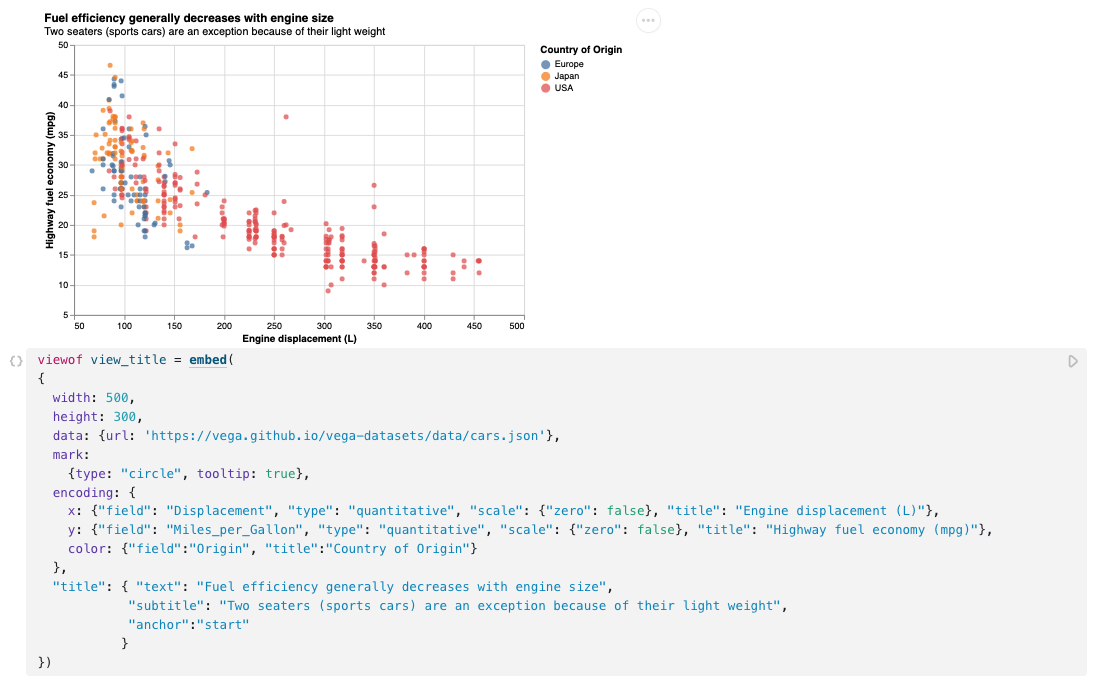

Vega-Altair version below. More information about Altair's [TitleParams](https://altair-viz.github.io/user_guide/generated/core/altair.TitleParams.html).

In [ ]:
alt.Chart(cars,
          title = alt.TitleParams(text = 'Fuel efficiency generally decreases with engine size',
                                  anchor = 'start',
                                  subtitle = 'Two seaters (sports cars) are an exception because of their light weight')
          ).mark_circle().encode(
    x = alt.X('Displacement:Q', title='Engine displacement (L)'),
    y = alt.Y('Miles_per_Gallon:Q', title = 'Highway fuel economy (mpg)'),
    color = alt.Color('Origin', title = 'Country of Origin')
)

alt.Chart(...)

### **Bar Chart with Labels**

JSON Specification From https://vega.github.io/vega-lite/examples/layer_bar_labels.html





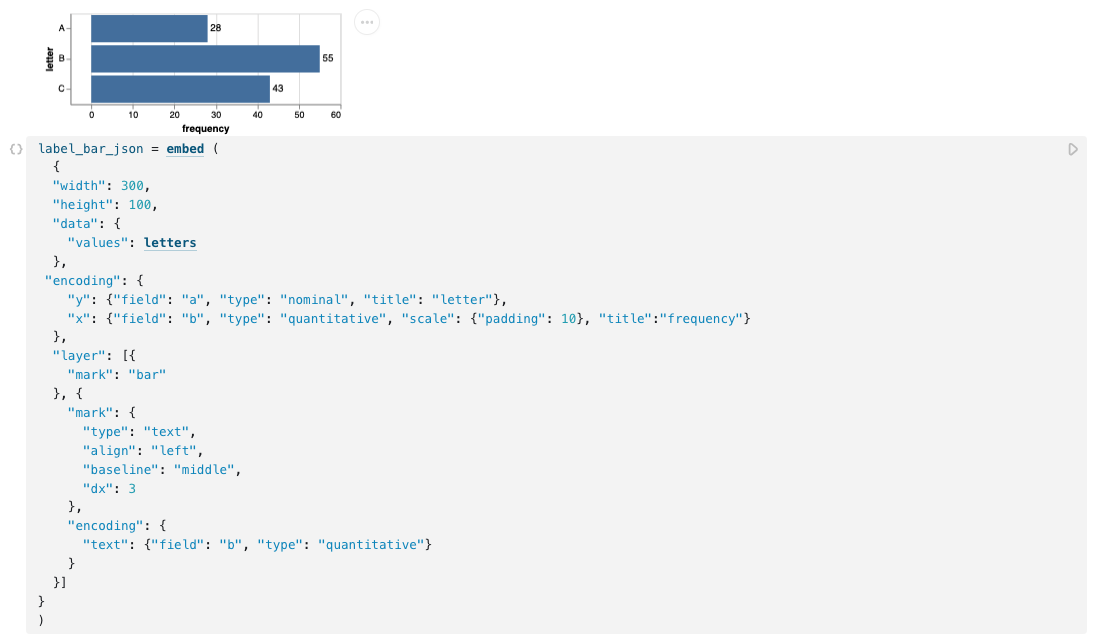

In [ ]:
import pandas as pd
letters = pd.DataFrame(
    {"a": ["A", "B", "C"],
     "b": [28, 55, 43]}
)
letters

a   b
0  A  28
1  B  55
2  C  43

Transform:
* `data: {"values": `*`variable`*`}` &nbsp; &rarr; &nbsp; `.Chart(`*`variable`*`)`

With Vega-Altair, you can create variables to represent different components of the chart and reuse them later, similar to the Vega-Lite API style. This approach makes creating layered charts more readable compared to using the Vega-Lite JSON style.

In [ ]:
bar = alt.Chart(letters).mark_bar().encode(
    y= alt.Y("a:N", title = "letter"),
    x= alt.X("b:Q", scale = alt.Scale(domain=[0, 60]), title = "frequency")
)
text = bar.mark_text(
    align="left",
    baseline="middle",
    dx=3
).encode(text="b")

bar + text # or alt.layer(bar, text)

alt.LayerChart(...)

### **Bar Chart with Mean Overlay**

From https://vega.github.io/vega-lite/examples/layer_precipitation_mean.html



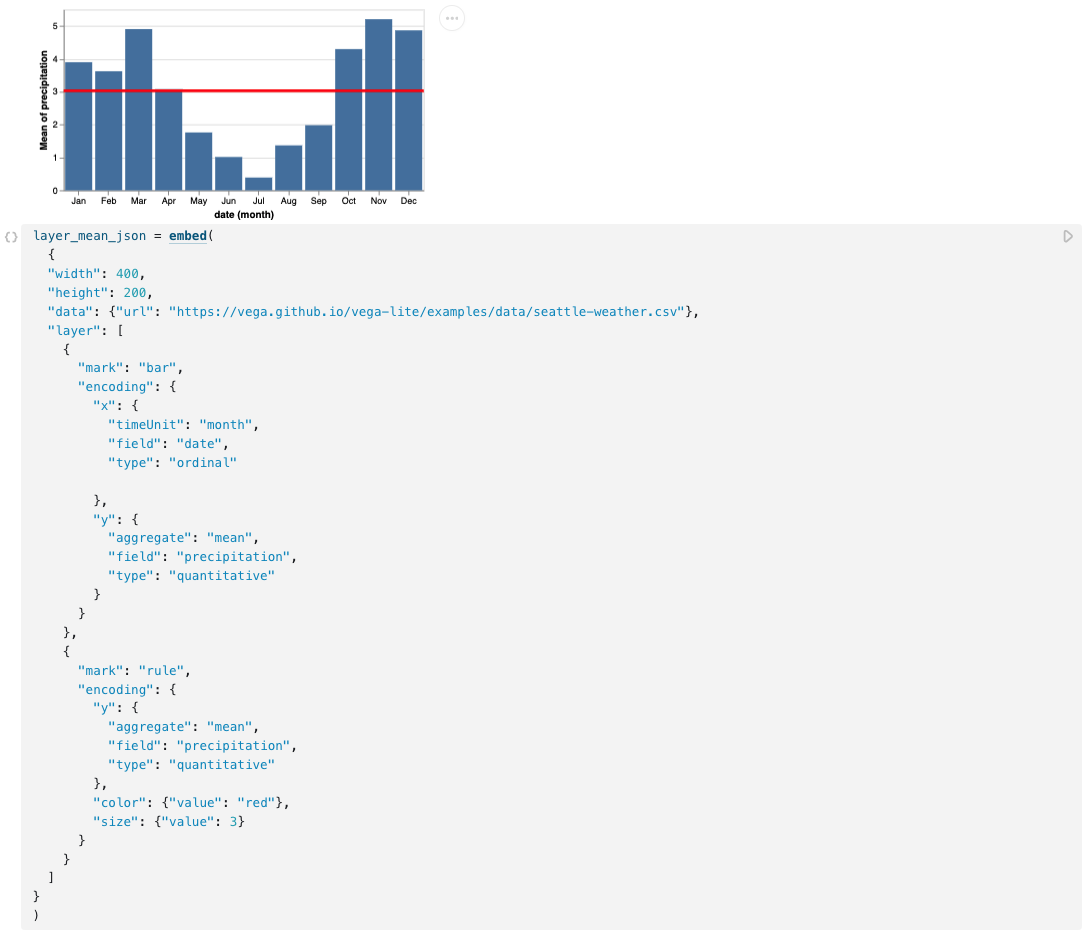

For the remaining examples, you should be able to see how the mappings are done. Vega-Altair code is much more compact compared to the Vega-Lite JSON style.

In [ ]:
seattle_weather = vega_data.seattle_weather() ## Download 'seattle-weather.csv' ; must replace - by _
seattle_weather.head()

date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain

In [ ]:
base = alt.Chart(seattle_weather).properties(width = 400, height = 200)

bar = base.mark_bar().encode(
    x = alt.X('date:O', timeUnit = 'month'),
    y = alt.Y('precipitation:Q', aggregate = 'mean')
)
rule = base.mark_rule(size = 3, color = 'red').encode(
    y = alt.Y('precipitation:Q', aggregate = 'mean')
)
bar + rule # or alt.layer(bar, rule)

alt.LayerChart(...)

### **Histogram with Mean Overlay**

From https://vega.github.io/vega-lite/examples/layer_histogram_global_mean.html



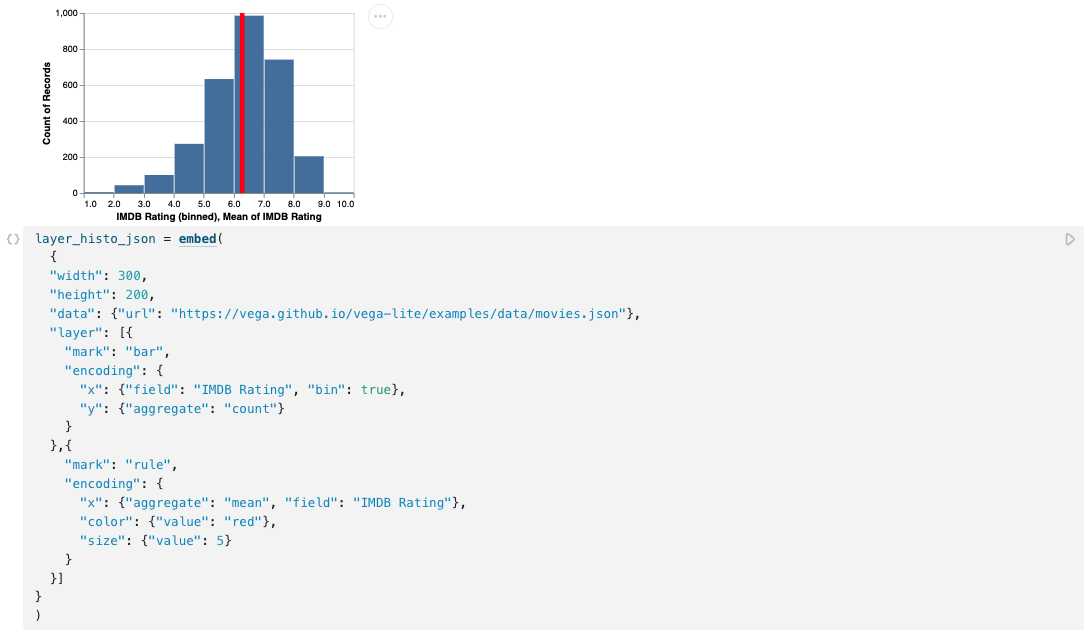

In [ ]:
base = alt.Chart(movies).properties(width = 300, height = 200)
bar = base.mark_bar().encode(
    x=alt.X('IMDB_Rating:Q', bin=True),
    y=alt.Y(aggregate = 'count', title='Count of Records')
)
rule = base.mark_rule(size = 10, color = 'red').encode(
    x = alt.X('IMDB_Rating:Q', aggregate = 'mean')
)
bar + rule

alt.LayerChart(...)